In [132]:
# Importing packages
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
! pip install ipywidgets

# The Edgeworth Box

In this project we will analyse a small closed economy with the Edgeworth Box. The Edgeworth box can be used to analyse several economic problems. But in this analysis we will use it to describe how two agents: a farmer and a manufacturer of windmills will act in an economy where they have to share the stock capital and labor. 

In [133]:
# We define the capital and labor share for agriculture, the capital share will be low compared to a 
# capital intense industry as windmill manufacturing.

ALPHA = 0.3   # Capital share in pork production
BETA = 0.7   # Labor share in pork production

KBAR = 100 
LBAR = 100 

p = 0.5      # =Pp/Pw  relative price of pork. Windmills will have the highest price.

# It is defined from the point of view of the pork producer.
# It is assumed that both goods are produced by a Cobb-Douglas production function:

# pork production function
def P(K,L,alpha=ALPHA):
    return (K**alpha)*(L**(1-alpha))

# pork production function
def W(K,L,beta=BETA):
    return (K**beta)*(L**(1-beta))

# budget constraint of the economy
def budgetc(c1, p1, p2, I):
    return (I/p2)-(p1/p2)*c1

# isoquant of the economy
def isoq(L, Q, mu):
    return (Q/(L**(1-mu)))**(1/mu)

# Efficiency locus
Now that we have defined the production functions and the budget constraints of the economy, it is time to define the efficiency locus, which is a line that represents all allocations where the two agents' isoquants are tangent and the economy is efficient.

In [134]:
# defining the edgeworth locus
def edgeworth(L, Kbar=KBAR, Lbar=LBAR,alpha=ALPHA, beta=BETA):
    a = (1-alpha)/alpha
    b = (1-beta)/beta
    return b*L*Kbar/(a*(Lbar-L)+b*L)

# Production Possibility frontier (PPF)
The PPF's are functions which describe the maximum possible production with given levels of capital and labor. It's the PPF's that the efficiency locus are running through. Below are plotted a PPF for pork production, which will use a huge amount of labor relative to capital.

In [137]:
def ppf(LP,Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):
   
    KP = edgeworth(LP, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KP/LP)
    QP = P(KP,LP,alpha)
    QW = W(Kbar-KP,Lbar-LP,beta)
    ax.scatter(QP,QW)
    Lp = np.arange(0,Lbar)
    Kp = edgeworth(Lp, Kbar, Lbar,alpha, beta)
    Qp = P(Kp,Lp,alpha)
    Qw = W(Kbar-Kp,Lbar-Lp,beta)
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(Qp, Qw,'k--')
    ax.set_xlabel(r'$Q_{Alpha}$',fontsize=12)
    ax.set_ylabel(r'$Q_{Beta}$',fontsize=12)
    plt.show()

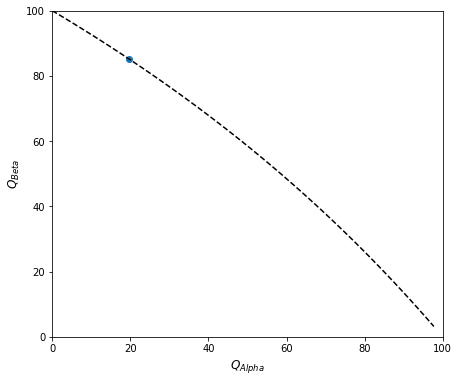

In [138]:
# Plotting the production possibility frontier
fig, ax = plt.subplots(figsize=(7,6))
ppf(30,alpha =0.3, beta=0.7)

# Modelling the Edgeworth Box
The Edgeworth Box are illustrated, using the economy we defined above.

In [139]:
def edgeplot(LP, Kbar=KBAR, Lbar=LBAR, alpha=ALPHA, beta=BETA):
    LP = 60
    KP = edgeworth(LP, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KP/LP)
    QP = P(KP,LP,alpha)
    QW = W(Kbar-KP,Lbar-LP,beta)
    print("(LP,KP)=({:4.1f}, {:4.1f})  (QP, QW)=({:4.1f}, {:4.1f})  RTS={:4.1f}"
          .format(LP,KP,QP,QW,RTS))
    Lp = np.arange(1,Lbar)
    fig, ax = plt.subplots(figsize=(12,8))
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(Lp, edgeworth(Lp,Kbar,Lbar,alpha,beta),'k-')
    ax.plot(Lp, isoq(Lp, QP, alpha),'b-')
    ax.plot(Lp, Kbar-isoq(Lbar-Lp, QW, beta),'r-')
    ax.plot(LP, KP,'ob')
    ax.vlines(LP,0,KP, linestyles="dashed")
    ax.hlines(KP,0,LP, linestyles="dashed")
    ax.text(-6,-6,r'$O_P$',fontsize=12)
    ax.text(Lbar,Kbar,r'$O_W$',fontsize=12)
    ax.set_xlabel(r'$Labor$', fontsize=12)
    ax.set_ylabel('$Capital$', fontsize=12)
    plt.show()

(LP,KP)=(60.0, 21.6)  (QP, QW)=(44.2, 64.1)  RTS= 0.2


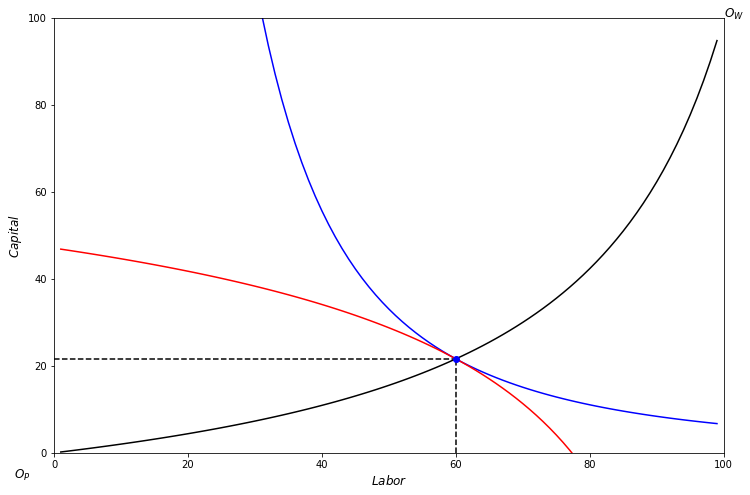

In [140]:
edgeplot(50)

# Analysis
The model shows, as expected, that the less capital intense industry will use a smaller share of the capital and more of the labor. 

In [141]:
# Interactive edgeworth box
LP = 50
interact(edgeplot, LP=(10, LBAR-10,1),
         Kbar=fixed(KBAR), Lbar=fixed(LBAR),
         alpha= (0.1,0.9,0.1), beta=(0.1,0.9,0.1));

interactive(children=(IntSlider(value=50, description='LP', max=90, min=10), FloatSlider(value=0.3, descriptio…

# Interactive model
In this interactive version of the Edgeworth Box, the reader can adjust the labor intensity and the $\alpha$ and $\beta$ values of pork production and see how windmill manufacturing reacts in the competitive economy.

# Conclusion
This Edgeworth Box is an excelent model to show how firms react to changes in other firms behavior. It showed that the firms use their comparative advantage so that a capital intensive industry will use the greatest share of capital and vice versa.